In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
data = pd.read_csv("./Downloads/michaels_mlb_cleaned_data.csv")
data = data[~data["pitch_type"].isin(["KC", "KN", "FS"])]
data

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,b_count,s_count,pitch_num
0,-0.390,3.600,91.0,84.2,1972.614,190.202,7.1,3.4,23.8,-3.210,...,-1.77,9.82,53.0,11.0,B,B,FC,1.0,0.0,2.0
1,-0.005,2.257,85.9,80.4,41.087,214.714,-1.0,8.1,23.9,-0.203,...,-0.13,0.14,48.0,5.0,F,S,SL,0.0,0.0,1.0
2,0.820,3.193,94.1,86.7,2376.304,205.009,30.8,3.2,23.8,-9.536,...,-4.96,10.59,58.0,12.0,S,S,FF,2.0,1.0,4.0
3,-0.088,2.358,94.1,87.2,2504.011,216.915,41.2,4.1,23.8,-14.264,...,-7.38,9.78,25.0,5.0,E,X,FF,3.0,2.0,8.0
4,1.370,2.934,92.6,85.7,2235.653,204.604,26.4,3.5,23.8,-8.694,...,-4.64,10.10,24.0,12.0,B,B,FF,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,-0.546,2.581,85.7,79.7,1954.270,189.166,6.9,4.2,23.8,-2.693,...,-1.67,10.33,54.0,4.0,F,S,FF,0.0,0.0,1.0
49996,1.000,2.212,92.2,84.9,1711.688,230.264,25.1,5.7,23.8,-12.244,...,-6.65,5.49,70.0,14.0,C,S,FF,0.0,0.0,1.0
49997,-0.403,2.133,94.4,88.2,2234.726,221.635,37.0,4.6,23.9,-14.146,...,-7.20,8.06,37.0,4.0,D,X,FF,0.0,1.0,2.0
49998,0.365,1.991,88.4,81.4,1864.988,227.714,26.4,6.0,23.8,-12.294,...,-7.29,6.58,45.0,9.0,X,X,SI,0.0,1.0,2.0


In [3]:
data.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'p_throws',
       'sz_bot', 'sz_top', 'pitcher_id', 'batter_side', 'vx0', 'vy0', 'vz0',
       'x', 'x0', 'y', 'y0', 'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code',
       'type', 'pitch_type', 'b_count', 's_count', 'pitch_num'],
      dtype='object')

In [4]:
data.dtypes

px              float64
pz              float64
start_speed     float64
end_speed       float64
spin_rate       float64
spin_dir        float64
break_angle     float64
break_length    float64
break_y         float64
ax              float64
ay              float64
az              float64
p_throws         object
sz_bot          float64
sz_top          float64
pitcher_id        int64
batter_side      object
vx0             float64
vy0             float64
vz0             float64
x               float64
x0              float64
y               float64
y0              float64
z0              float64
pfx_x           float64
pfx_z           float64
nasty           float64
zone            float64
code             object
type             object
pitch_type       object
b_count         float64
s_count         float64
pitch_num       float64
dtype: object

In [5]:
data.dtypes

px              float64
pz              float64
start_speed     float64
end_speed       float64
spin_rate       float64
spin_dir        float64
break_angle     float64
break_length    float64
break_y         float64
ax              float64
ay              float64
az              float64
p_throws         object
sz_bot          float64
sz_top          float64
pitcher_id        int64
batter_side      object
vx0             float64
vy0             float64
vz0             float64
x               float64
x0              float64
y               float64
y0              float64
z0              float64
pfx_x           float64
pfx_z           float64
nasty           float64
zone            float64
code             object
type             object
pitch_type       object
b_count         float64
s_count         float64
pitch_num       float64
dtype: object

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


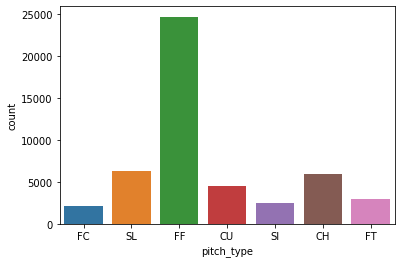

In [6]:
# Plotting counts of each pitch type
sns.countplot(data["pitch_type"]);

In [12]:
training_data = data[["px", "pz", "start_speed", "end_speed", 
                      "spin_rate","spin_dir", "break_angle", 
                      "break_length", 
                      #"break_y", 
                      "ax", "ay", "az",
                      #"sz_bot", "sz_top", 
                      "vx0", "vy0", "vz0", "x",
                      "x0", "y", #"y0", 
                      "z0", "pfx_x", "pfx_z", "nasty",
                      #"zone",
                      "b_count", "s_count"
                     ]]
training_data

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,ax,ay,...,vz0,x,x0,y,z0,pfx_x,pfx_z,nasty,b_count,s_count
0,-0.390,3.600,91.0,84.2,1972.614,190.202,7.1,3.4,-3.210,26.950,...,-3.020,132.02,-2.760,141.47,5.780,-1.77,9.82,53.0,1.0,0.0
1,-0.005,2.257,85.9,80.4,41.087,214.714,-1.0,8.1,-0.203,22.761,...,-3.231,117.19,-1.870,177.84,6.108,-0.13,0.14,48.0,0.0,0.0
2,0.820,3.193,94.1,86.7,2376.304,205.009,30.8,3.2,-9.536,30.021,...,-5.696,85.74,-1.641,152.57,6.079,-4.96,10.59,58.0,2.0,1.0
3,-0.088,2.358,94.1,87.2,2504.011,216.915,41.2,4.1,-14.264,28.011,...,-7.381,120.35,-1.768,175.11,5.952,-7.38,9.78,25.0,3.0,2.0
4,1.370,2.934,92.6,85.7,2235.653,204.604,26.4,3.5,-8.694,27.656,...,-6.061,64.78,-0.897,159.56,6.109,-4.64,10.10,24.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,-0.546,2.581,85.7,79.7,1954.270,189.166,6.9,4.2,-2.693,23.243,...,-6.363,139.38,-1.901,169.90,6.392,-1.67,10.33,54.0,0.0,0.0
49996,1.000,2.212,92.2,84.9,1711.688,230.264,25.1,5.7,-12.244,29.749,...,-5.798,78.88,-0.575,179.06,5.941,-6.65,5.49,70.0,0.0,0.0
49997,-0.403,2.133,94.4,88.2,2234.726,221.635,37.0,4.6,-14.146,26.422,...,-7.767,132.36,-1.079,181.19,6.039,-7.20,8.06,37.0,0.0,1.0
49998,0.365,1.991,88.4,81.4,1864.988,227.714,26.4,6.0,-12.294,27.645,...,-7.160,103.09,-0.887,185.02,6.415,-7.29,6.58,45.0,0.0,1.0


In [13]:
# One hot encoding the handedness of the pitcher
pitcher_hand_onehot = pd.get_dummies(data["p_throws"])
#training_data[pitcher_hand_onehot.columns] = pitcher_hand_onehot
training_data["L"] = pitcher_hand_onehot["L"]
training_data

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,ax,ay,...,x,x0,y,z0,pfx_x,pfx_z,nasty,b_count,s_count,L
0,-0.390,3.600,91.0,84.2,1972.614,190.202,7.1,3.4,-3.210,26.950,...,132.02,-2.760,141.47,5.780,-1.77,9.82,53.0,1.0,0.0,0
1,-0.005,2.257,85.9,80.4,41.087,214.714,-1.0,8.1,-0.203,22.761,...,117.19,-1.870,177.84,6.108,-0.13,0.14,48.0,0.0,0.0,0
2,0.820,3.193,94.1,86.7,2376.304,205.009,30.8,3.2,-9.536,30.021,...,85.74,-1.641,152.57,6.079,-4.96,10.59,58.0,2.0,1.0,0
3,-0.088,2.358,94.1,87.2,2504.011,216.915,41.2,4.1,-14.264,28.011,...,120.35,-1.768,175.11,5.952,-7.38,9.78,25.0,3.0,2.0,0
4,1.370,2.934,92.6,85.7,2235.653,204.604,26.4,3.5,-8.694,27.656,...,64.78,-0.897,159.56,6.109,-4.64,10.10,24.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,-0.546,2.581,85.7,79.7,1954.270,189.166,6.9,4.2,-2.693,23.243,...,139.38,-1.901,169.90,6.392,-1.67,10.33,54.0,0.0,0.0,0
49996,1.000,2.212,92.2,84.9,1711.688,230.264,25.1,5.7,-12.244,29.749,...,78.88,-0.575,179.06,5.941,-6.65,5.49,70.0,0.0,0.0,0
49997,-0.403,2.133,94.4,88.2,2234.726,221.635,37.0,4.6,-14.146,26.422,...,132.36,-1.079,181.19,6.039,-7.20,8.06,37.0,0.0,1.0,0
49998,0.365,1.991,88.4,81.4,1864.988,227.714,26.4,6.0,-12.294,27.645,...,103.09,-0.887,185.02,6.415,-7.29,6.58,45.0,0.0,1.0,0


In [14]:
# One hot encoding ball and strike counts
training_data['Balls, Strikes'] = training_data[['b_count', 's_count']].values.tolist()
training_data['Balls, Strikes'] = training_data['Balls, Strikes'].astype(str)
training_data = pd.get_dummies(data=training_data, columns=['Balls, Strikes'])
training_data

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,ax,ay,...,"Balls, Strikes_[1.0, 0.0]","Balls, Strikes_[1.0, 1.0]","Balls, Strikes_[1.0, 2.0]","Balls, Strikes_[2.0, 0.0]","Balls, Strikes_[2.0, 1.0]","Balls, Strikes_[2.0, 2.0]","Balls, Strikes_[3.0, 0.0]","Balls, Strikes_[3.0, 1.0]","Balls, Strikes_[3.0, 2.0]","Balls, Strikes_[4.0, 2.0]"
0,-0.390,3.600,91.0,84.2,1972.614,190.202,7.1,3.4,-3.210,26.950,...,1,0,0,0,0,0,0,0,0,0
1,-0.005,2.257,85.9,80.4,41.087,214.714,-1.0,8.1,-0.203,22.761,...,0,0,0,0,0,0,0,0,0,0
2,0.820,3.193,94.1,86.7,2376.304,205.009,30.8,3.2,-9.536,30.021,...,0,0,0,0,1,0,0,0,0,0
3,-0.088,2.358,94.1,87.2,2504.011,216.915,41.2,4.1,-14.264,28.011,...,0,0,0,0,0,0,0,0,1,0
4,1.370,2.934,92.6,85.7,2235.653,204.604,26.4,3.5,-8.694,27.656,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,-0.546,2.581,85.7,79.7,1954.270,189.166,6.9,4.2,-2.693,23.243,...,0,0,0,0,0,0,0,0,0,0
49996,1.000,2.212,92.2,84.9,1711.688,230.264,25.1,5.7,-12.244,29.749,...,0,0,0,0,0,0,0,0,0,0
49997,-0.403,2.133,94.4,88.2,2234.726,221.635,37.0,4.6,-14.146,26.422,...,0,0,0,0,0,0,0,0,0,0
49998,0.365,1.991,88.4,81.4,1864.988,227.714,26.4,6.0,-12.294,27.645,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# One hot encoding pitch types
targets = pd.get_dummies(data["pitch_type"])
targets

,CH,CU,FC,FF,FT,SI,SL
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
49994,0,0,0,1,0,0,0
49996,0,0,0,1,0,0,0
49997,0,0,0,1,0,0,0
49998,0,0,0,0,0,1,0


In [16]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, targets, test_size=0.25, random_state=42)

In [17]:
# Training Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
pred = rf.predict(X_test)
pred

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
# RF test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.8361378859663454

In [15]:
# RF train accuracy
accuracy_score(rf.predict(X_train), y_train)

0.9850510551395507

In [16]:
# Cross validation for feature selection
from sklearn.model_selection import cross_validate
cv = cross_validate(RandomForestClassifier(random_state=42), X_train, y_train, cv=5)
cv

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron

{'fit_time': array([0.93648219, 0.91527724, 1.0000031 , 1.05804014, 0.98003817]),
 'score_time': array([0.03863811, 0.03875089, 0.0458672 , 0.042207  , 0.03981686]),
 'test_score': array([0.82791014, 0.82995235, 0.84288632, 0.83144997, 0.832403  ])}

In [17]:
cv["test_score"].mean()

0.8329203539823009

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


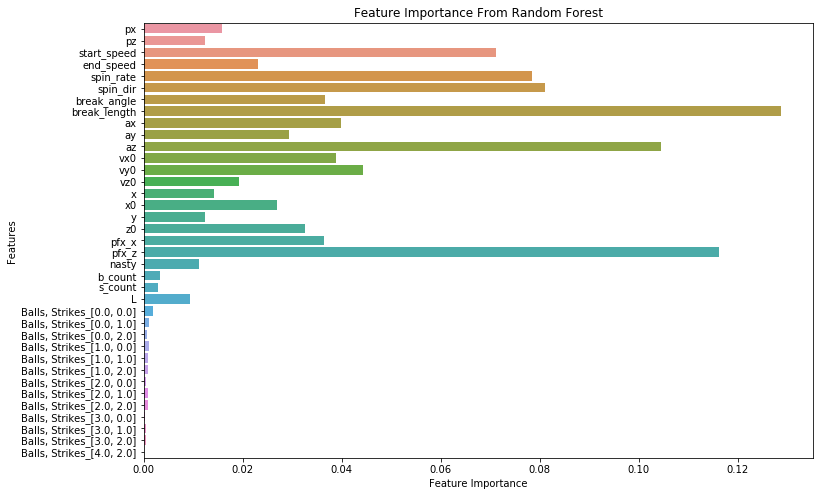

In [18]:
# Plotting Feature Importance Graph from Random Forest
plt.figure(figsize=(12, 8))
plt.ylabel("Features")
plt.title("Feature Importance From Random Forest")
plt.xlabel("Feature Importance")
sns.barplot(rf.feature_importances_, training_data.columns)

In [19]:
# Hyperparameter tune Random Forest Model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 25, 100, 250],
    'min_samples_split': [2, 3, 4, 5, 10, 15],
    'n_estimators': [2, 5, 10, 20, 100]
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [20]:
# Hyperparamters for tuned model
best_model = CV_rfc.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


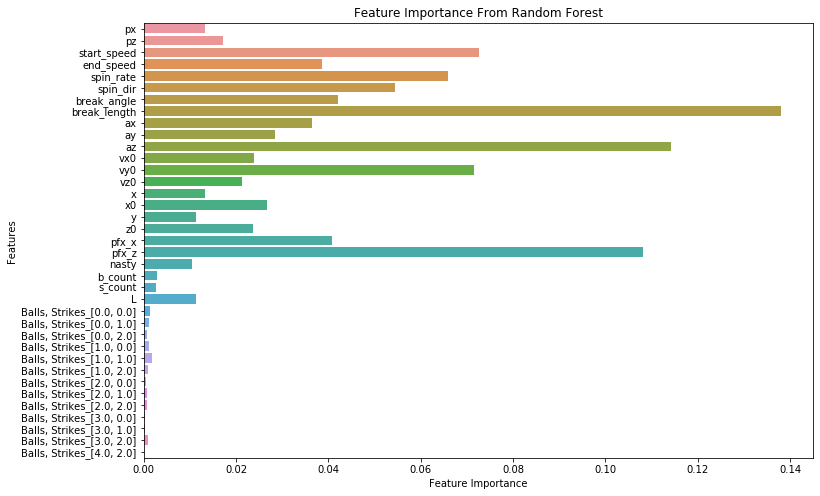

In [23]:
# Plotting Feature Importance Graph from Hyperparameter Tuned Random Forest
plt.figure(figsize=(12, 8))
plt.ylabel("Features")
plt.title("Feature Importance From Random Forest")
plt.xlabel("Feature Importance")
sns.barplot(best_model.feature_importances_, training_data.columns)

In [25]:
# Test accuracy for RF after hyperparamter tuning
accuracy_score(best_model.predict(X_test), y_test)

0.857049501715406

In [26]:
# Train accuracy for RF after hyperparamter tuning
accuracy_score(best_model.predict(X_train), y_train)

0.9925663716814159

In [560]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

In [562]:
y_test_numeric = np.argmax(np.array(y_test), axis=1)
y_test_numeric

array([0, 0, 3, ..., 3, 1, 0])

In [563]:
y_pred_softmax = best_model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred_softmax]

In [564]:
y = data[["pitch_type"]]
y

,pitch_type
0,FC
1,SL
2,FF
3,FF
4,FF
...,...
49994,FF
49996,FF
49997,FF
49998,SI


In [565]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aaronchow/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[1439    1    1    6    6   13   12]
 [  10 1042    0    0    0    0   73]
 [  65    1  300   50    0    1  102]
 [ 189    0   20 5886   45   11    5]
 [ 220    0    0  124  316   81    0]
 [ 238    0    0   69  146  189    0]
 [  78   46   40    3    0    0 1414]]


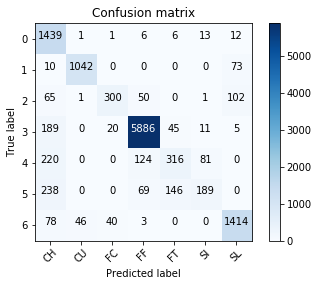

In [566]:
# Plotting Confusion Matrix
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test_numeric, y_pred=y_pred)
plot_confusion_matrix(cm, encoder.classes_,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)

In [552]:
encoder.classes_

array(['CH', 'CU', 'FC', 'FF', 'FT', 'SI', 'SL'], dtype=object)